# DETECÇÃO DE FRAUDES DE COMPRAS ONLINE

## Definição do Escopo do negócio

O escopo é a identificação de Fraudes nas Compras de E-commerce. 
A partir do dataset, que é um arquivo que contém os clientes e suas compras, será gerado modelos preditivos que classificará novas compras de clientes como sendo fraude ou não. 

## Versão 1
Essa versão é uma implementação mais simples, cujo objetivo é ter a visão mais básica de uma implementação e comparar seu resultado com as próximas versões onde serão aplicadas diversas técnicas de otimização.
Assim, várias técnicas de análise, otimização serão analisadas no script da versão 2.

Sendo assim, essa versão 1 não deve ser considerado como a versão final e definitiva mas sim, uma versão inicial para conhecimento do básico e assim poder avançar para as versões mais avançadas e finais.

## Fluxo implementado:

*   Carga do Dataset
*   Análise Exploratória dos Dados (EDA)
    * Label Encoder
*   Separação dos Dados de Treino e Teste (Spliting)
*   Treinamento (Fitting), criando 5 modelos de classificação:
    * Naive Bayes
    * Regressão Logistica (Logistic Regression)
    * KNN
    * Árvore de Decisão (Decision Tree)
    * Random Forest
*   Validação/Acurácia e comparativos


# 1 . DATASET

In [1]:
# Importando arquivos
from pandas import read_csv
import warnings
warnings.filterwarnings('ignore')

arquivo = 'fraud_ecommerce.csv'
dfbase = read_csv(arquivo)

# Retorna a qtde de linha e colunas carregadas
dfbase.shape

(151114, 11)

# 2 . ANÁLISE EXPLORATÓRIA DOS DADOS (EDA - EXPLORATORY DATA ANALYSIS)

A Análise Exploratória dos Dados (EDA - Exploratory Data Analysis) é considerada a etapa mais importante e crucial da montagem de um modelo preditivo.

Pois é o início de tudo, que irá ditar quais as técnicas a serem utilizadas, quais transformações que devem ser efetuadas e que podem melhorar o aprendizado do modelo.
Uma análise exploratória bem efetuada gerará um aprendizado do modelo mais apurado e consequentemente resultadará em uma melhor acurácia.

Para essa versão básica, iremos usar uma análise exploratória mais simples para justamente nas versões mais avançadas aplicando as análises mais apuradas, compararmos os resultados.

In [2]:
# Visualizando os primeiros registros. Se não informar o parâmetro, o padrão é os 5 primeiros
dfbase.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,0.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,0.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,0.0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42.0,ALEYXFXINSXLZ,Ads,Chrome,M,18.0,2.809315e+09,0.0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11.0,IWKVZHJOCLPUR,Ads,Chrome,F,19.0,3.987484e+09,0.0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27.0,HPUCUYLMJBYFW,Ads,Opera,M,34.0,1.692459e+09,0.0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30.0,ILXYDOZIHOOHT,SEO,IE,F,43.0,3.719094e+09,0.0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62.0,NRFFPPHZYFUVC,Ads,IE,M,31.0,3.416747e+08,0.0


In [3]:
# Você pode também visualizar os últimos registros 
dfbase.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151109,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35.0,LYSFABUCPCGBA,SEO,Safari,M,32.0,2.439047e+09,0.0
151110,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40.0,MEQHCSJUBRBFE,SEO,IE,F,26.0,2.748471e+09,0.0
151111,9999000,2015-01-01 07:02:20,NaN,NaN,ZINIADFCLHYPG,Direct,IE,M,NaN,4.103825e+09,NaN
151112,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46.0,CMCXFGRHYSTVJ,SEO,Chrome,M,37.0,3.601175e+09,0.0
151113,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20.0,ZINIADFCLHYPG,Direct,IE,M,38.0,4.103825e+09,0.0


In [4]:
# Visualizando as colunas e os tipos
dfbase.dtypes

# DICA: os atributos carregados como string(alfanumérico) estarão como object.
# Perceba então que os atributos de data de cadastro (signup_time) e de compra (purchase_time) estão como texto e não como data.

user_id             int64
signup_time        object
purchase_time      object
purchase_value    float64
device_id          object
source             object
browser            object
sex                object
age               float64
ip_address        float64
class             float64
dtype: object

In [5]:
# Exibindo valores estatísticos básicos dos campos numéricos (os campso que não são números são automaticamente omitidos)
#=> DICA: Analise a medida "min" para verificar rapidamente se há atributos com negativos

dfbase.describe()

,user_id,purchase_value,age,ip_address,class
count,1.511140e+05,151112.000000,151112.000000,1.511130e+05,151112.000000
mean,2.003007e+05,36.935372,33.140704,2.152158e+09,0.093646
std,1.207505e+05,18.322762,8.617733,1.248503e+09,0.291336
min,2.000000e+00,9.000000,18.000000,5.209350e+04,0.000000
25%,1.006435e+05,22.000000,27.000000,1.085939e+09,0.000000
50%,1.999625e+05,35.000000,33.000000,2.154785e+09,0.000000
75%,3.000615e+05,49.000000,39.000000,3.243264e+09,0.000000
max,9.999000e+06,154.000000,76.000000,4.294850e+09,1.000000


In [6]:
#=> DICA: Caso haja muitos atributos, parte deles podem não ser exibidos. 
# Então utilize o campo de Transpor (trocar linhas e colunas)
dfbase.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,151114.0,2.003007e+05,1.207505e+05,2.000000,1.006435e+05,1.999625e+05,3.000615e+05,9.999000e+06
purchase_value,151112.0,3.693537e+01,1.832276e+01,9.000000,2.200000e+01,3.500000e+01,4.900000e+01,1.540000e+02
age,151112.0,3.314070e+01,8.617733e+00,18.000000,2.700000e+01,3.300000e+01,3.900000e+01,7.600000e+01
ip_address,151113.0,2.152158e+09,1.248503e+09,52093.496895,1.085939e+09,2.154785e+09,3.243264e+09,4.294850e+09
class,151112.0,9.364577e-02,2.913362e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## VALORES FALTANTES (MISSING)

In [7]:
# Verificando se há atributos com dados faltantes (Missing ou NA). Aqueles que tiverem estão com qtde maior que zero
dfbase.isna().sum()

user_id           0
signup_time       0
purchase_time     2
purchase_value    2
device_id         1
source            1
browser           0
sex               1
age               2
ip_address        1
class             2
dtype: int64

In [8]:
# Visualizando as linhas que tenham o atributo específico com valores faltantes (NA)
dfbase[dfbase['purchase_time'].isna()]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151077,9999000,2015-02-01 00:00:00,NaN,NaN,NaN,NaN,Firefox,NaN,NaN,NaN,NaN
151111,9999000,2015-01-01 07:02:20,NaN,NaN,ZINIADFCLHYPG,Direct,IE,M,NaN,4.103825e+09,NaN


Há vários tipos de tratamentos que podem ser efetuados para valores faltantes. Entre eles são:
* 1- Excluir a linha toda.
* 2- Manter a linha mas excluir a coluna de todas as linhas.
* 3- Substituir o valor faltante por um outro (como por zero, valor da média, etc).
* Há outros tratamentos mas listei apenas alguns. Os detalhes de todas opções vale um script específico para esse tema.

Para decidir qual utilizar, deve ser feito realmente uma análise detalhada.
- A primeira opção é a mais fácil mas por outro lado, pode perder informações que são necessárias.
- Similar a segunda opção, pois pode perder informações importantes das outras linhas que possuem dados preenchidos na coluna excluída.
- A terceira opção é uma forma mas dependendo pode distorcer a informação na análise e aprendizado final.


Irei utilizar para esse caso a primeira opção, exclusão das linhas com valores faltantes.
O motivo é que nessas linhas os valores não preenchidos são de atributos (colunas) são importantes, como a data da compra, valor da compra e nem o atributo class que será usado como target para treino e teste. Ou seja, sem essas informações preenchidas, essas linhas não tem valor dentro da análise e aprendizado do modelo.


In [9]:
# Excluindo (apenas) as linhas cuja coluna purchase_time esteja linha. 
dfbase = dfbase.dropna(subset=['purchase_time'])
dfbase.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [10]:
# Listando a quantidade de linhas. Veja que diminiu a qtde de linhas.
print(dfbase.shape)

(151112, 11)


# 3 . TRANSFORMAÇÃO

Pode ocorrer que somente os atributos carregados não sejam suficientes ou na sua forma original não seja utilizável.

Nessas situações pode ser criado novos atributos a partir de transformações dos atuais.

Nessa versão 1, não vamos executar isso para justamente compararmos os resultando entre as versões com e sem essa transformação.

# 4 . FE - FEATURE ENGINEERNING / FEATURE SELECTION

A etapa de Seleção dos Atributos (Feature Selection) é uma das mais importantes para a construção de um modelo preditivo.

A simples escolha ou não de determinados atributos impacta diretamente no resultado.
Para isso, há várias técnicas a serem utilizadas.

Porém, nessa versão básica, será apenas escolhido manualmente os atributos.
Na próxima versão mais avançada, serão apresentados algumas das técnicas e efetuados as comparações os resultados.

Explicação da não escolha dos atributos:
* user_id
  * é um campo de identificação, único e totalmente específico. Não produz relevância para fazer predições de novos clientes. Ao contrário, seu uso pode gerar distorções no modelo gerado.
* device_id
  * idem acima.
* id_address
  * idem acima se usado o código inteiro. Porém, para um processo de análise mais avançado, poderia ser utilizado changes do IP para determinar regiões que são mais sucessíveis a fraudes.
* signup_time
  * É uma data específica incluindo horas-minutos-segundos. Para essa versão 1 não iremos utilizar esse campo.
* purchase_time
  * Idem acima.

Sobre os atributos que foram selecionados, isso não significa que necessariamente todos são relevantes para a montagem do modelo. Por exemplo, o tipo do navegador (browser) é relevante para detectar fraudes?
Tudo isso será identificados nas técnicas de Feature Selection, onde será feitos algumas simulações para verificar quais conjuntos de atributos trazem melhores resultados.

# 5 . SPLITING X e Y

### Montando a base dos atributos previsores (X) e a base do alvo (Y)

In [11]:
# Criando as bases X e Y
X_previsores = dfbase.loc[:, ['purchase_value' ,'source', 'browser', 'sex', 'age']].values
Y_target = dfbase.loc[:, 'class'].values

## Label Enconder

Alguns algoritmos requerem que os dados estejam preenchidos com números e não com descrições alfanuméricos (texto).
Nesse caso, aplica-se uma técnica para gerar códigos numéricos para cada atributo.

In [12]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

X_previsores[:, 1] = labelencoder.fit_transform(X_previsores[:, 1])
X_previsores[:, 2] = labelencoder.fit_transform(X_previsores[:, 2])
X_previsores[:, 3] = labelencoder.fit_transform(X_previsores[:, 3]) 
 

In [13]:
# Gerando as bases de Treino e de Teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_previsores, Y_target, test_size=0.33, random_state=0 ) 

# 6 . TREINANDO (FITTING) MODELOS DOS ALGORITMOS

Iremos gerar 5 modelos do tipo Classificação e comparar seus resultados:
* Logistic Regression
* Naive Bayes
* Decision Tree
* Random Forest
* KNN

Nessa versão 1, por ser básica, não iremos gerar os modelos com SVM e Neural Network (Rede Neural). Isso será utilizado na versão 2.

Obs: é possível otimizar a execução de mais de um modelo em um único loop.
Mas para essa primeira versão, deixei uma célula para cada tipo de modelo para ficar didaticamente mais fácil.


É possível informar para cada modelo, valores para alguns parâmetros.
Para essa versão 1, não informei e deixei que as funções utilizem seus  valores default que não necessariamente são os melhores.
O processo de escolher os melhores parâmetros, chamado de Tunning, será aplicado na versão 2. 

## LOGISTIC REGRESSION

In [14]:
# Montando o modelo
from sklearn.linear_model import LogisticRegression

modelo_LR = LogisticRegression(random_state=0)

# Treinando o modelo
modelo_LR.fit(X_treino, Y_treino)

# Predição
predicao_LR = modelo_LR.predict(X_teste)

## NAIVE BAYES

In [15]:
# Montando o modelo
from sklearn.naive_bayes import GaussianNB

modelo_NB = GaussianNB()

# Treinando o modelo
modelo_NB.fit(X_treino, Y_treino)

# Predição
predicao_NB = modelo_NB.predict(X_teste)

## DECISION TREE

In [16]:
# Montando o modelo
from sklearn.tree import DecisionTreeClassifier

modelo_DT = DecisionTreeClassifier(random_state=0)

# Treinando o modelo
modelo_DT.fit(X_treino, Y_treino)

# Predição
predicao_DT = modelo_DT.predict(X_teste)

## RANDOM FOREST

In [17]:
# Montando o modelo
from sklearn.ensemble import RandomForestClassifier

modelo_RF = RandomForestClassifier(random_state=0)

# Treinando o modelo
modelo_RF.fit(X_treino, Y_treino)

# Predição
predicao_RF = modelo_RF.predict(X_teste)

## KNN

In [18]:
# Montando o modelo
from sklearn.neighbors import KNeighborsClassifier

modelo_KNN = KNeighborsClassifier()

# Treinando o modelo
modelo_KNN.fit(X_treino, Y_treino)

# Predição
predicao_KNN = modelo_KNN.predict(X_teste)

# 7 . VALIDAÇÃO

## Calculando a Acurácia

A Acurácia (o acerto) da predição é feita comparando os valores previsto com os valores de teste e assim determinando seus acertos, utilizando assim uma função Accuracy Score.

In [19]:
from sklearn.metrics import accuracy_score 
from pandas import DataFrame

# Cálcula a acurácia de cada modelo
acuracia_LR = accuracy_score(Y_teste, predicao_LR)
acuracia_NB = accuracy_score(Y_teste,predicao_NB)
acuracia_DT = accuracy_score(Y_teste, predicao_DT)
acuracia_KNN = accuracy_score(Y_teste, predicao_KNN)
acuracia_RF = accuracy_score(Y_teste, predicao_RF)
#acuracia_SVM = accuracy_score(Y_teste, predicao_SVM)
#acuracia_NN = accuracy_score(Y_teste, predicao_NN)

# Consolida os resultados para serem exibidos em uma tabela e gráfico comparativo
acuracias = [['Logistic Regression', round(acuracia_LR*100, 2)],
           ['KNN', round(acuracia_KNN*100, 2)],
           ['Naives Bayes', round(acuracia_NB*100, 2)],
           ['Decision Tree', round(acuracia_DT*100, 2)],
           ['Random Forest', round(acuracia_RF*100, 2)]
          ]

dfacuracias = DataFrame(acuracias)
dfacuracias.columns = ['Modelo', 'Acurácia']
dfacuracias = dfacuracias.sort_values(['Acurácia', 'Modelo'])
dfacuracias

,Modelo,Acurácia
0,Logistic Regression,90.84
2,Naives Bayes,90.84
3,Decision Tree,91.17
4,Random Forest,91.75
1,KNN,92.20


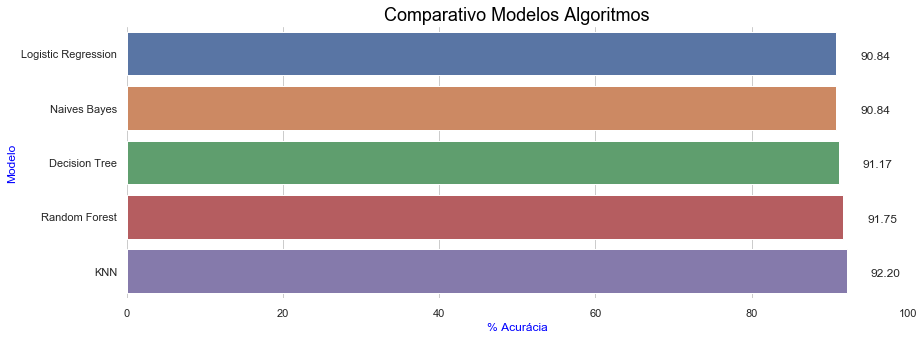

In [20]:
# Montando o gráfico comparativo das Acurácias

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (14, 5))

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
g = sns.barplot(x="Acurácia", y="Modelo", data=dfacuracias)
g.axes.set_title('Comparativo Modelos Algoritmos', fontsize=18,color="black",alpha=2)
g.set_xlabel("% Acurácia", size = 12,color="blue")
g.set_ylabel("Modelo", size = 12,color="blue")
g.set_xlim(0, 100)
sns.despine(left=True, bottom=True)
ax=g
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

## Calculando a Confusion Matrix

A Confusion Matrix é uma ótima ferramenta para analisar a distribuição dos acertos (a acurácia) e erros cometidos.
Apenas analisando a acurácia do modelo não é possível verificar como está essa distribuição.

Ela compara o resultado previsto com o esperado e monta assim uma matriz com a distribuição dos acertos e dos erros.

No topo estão os valores previstos calculados pelo modelo e do lado esquerdo verticalmente estão os valores reais.

Os valores que foram acertados estão na diagonal da esquerda do topo até a direita inferior. E os erros estao na diagonal oposta.  

In [21]:
from sklearn.metrics import confusion_matrix

print('Logistic Regression:') 
print(confusion_matrix(Y_teste, predicao_LR))
print('Naive Bayes:') 
print(confusion_matrix(Y_teste,predicao_NB))
print('Decision Tree:') 
print(confusion_matrix(Y_teste, predicao_DT))
print('Random Forest:') 
print(confusion_matrix(Y_teste, predicao_RF))
print('KNN:') 
print(confusion_matrix(Y_teste, predicao_KNN))

Logistic Regression:
[[45300     0]
 [ 4567     0]]
Naive Bayes:
[[45300     0]
 [ 4567     0]]
Decision Tree:
[[43344  1956]
 [ 2446  2121]]
Random Forest:
[[43600  1700]
 [ 2413  2154]]
KNN:
[[43911  1389]
 [ 2499  2068]]


### Comentários sobre o resultado do Confusion Matrix:

#### Logistic Regression e Naive Bayes
O modelo Logistic Regression e Naive Bayes, apesar de terem acurácia em torno de 90% e acertarem toda a previsão da classe 0, teve um desempenho ruim para a previsão da classe 1, onde erraram todas as previsões para essa classe!
Isso é um indício que esses dois modelos estão sofrendo de Overfitting, que ocorre quando o modelo treinado aprende demais uma situação (no caso a previsão da classe 0) mas não consegue identificar outras situações, como a classe 1.
Nesse caso, será necessário aplicar técnicas para reajustar isso.

#### Decision Tree
A acurácia desse modelo ficou parecido com o Logistic Regression e Naive Bayes, porém seus erros estão distribuídos nas duas classes (previsões). Isso demonstra que não deve ser analisado apenas o resultado da acurácia. A Confusion Matrix é extremamente importante para a análise dos acertos e erros.

#### Random Forest e KNN
Esses praticamente possuem quase a mesma acurácia mas com ligeira diferença nas distribuições dos acertos e erros.

# CONCLUSÃO

Apesar de um índice alto de acurácia, com todos os modelos tendo mais que 90% de acerto, os modelos requerem tratamentos. Há sinais claros que há modelos sofrendo de Overfitting.

No script da próxima versão será demonstrado outras técnicas como:
* Seleção dos Atributos (Feature Selection) mais apurado
* Verificação da Outliers
* Cross-Validation
* Seleção de Hiperparâmetros dos Algoritmos
* Criaççao de modelos com SVM e Rede Neural
